Pre-visualization of the normalized count data before any differential analysis

# Load

## Libraries and functions

In [1]:
source("load_libraries.R")

Warning message in is.na(x[[i]]):
“is.na() applied to non-(list or vector) of type 'environment'”Warning message in rsqlite_fetch(res@ptr, n = n):
“Don't need to call dbFetch() for statements, only for queries”

*
*  Package WGCNA 1.63 loaded.
*
*    Important note: It appears that your system supports multi-threading,
*    but it is not enabled within WGCNA in R. 
*    To allow multi-threading within WGCNA with all available cores, use 
*
*          allowWGCNAThreads()
*
*    within R. Use disableWGCNAThreads() to disable threading if necessary.
*    Alternatively, set the following environment variable on your system:
*
*          ALLOW_WGCNA_THREADS=<number_of_processors>
*
*    for example 
*
*          ALLOW_WGCNA_THREADS=4
*
*    To set the environment variable in linux bash shell, type 
*
*           export ALLOW_WGCNA_THREADS=4
*
*     before running R. Other operating systems or shells will
*     have a similar command to achieve the same aim.
*


Allowing multi-threading with up to 4 threads.
[1] "preparing gene to GO mapping data..."
[1] "preparing IC data..."
[1] "preparing gene to GO mapping data..."
[1] "preparing IC data..."
[1] "preparing gene to GO mapping data..."
[1] "prepar

In [2]:
source("functions.R")

## Data

In [3]:
load("../results/dge/norm_counts.RData")

In [4]:
head(norm_counts)

GF_104w_F_1_2 GF_104w_F_2_2 GF_104w_F_3_2 GF_104w_M_1_2
0610005C13Rik    0.0000        0.00000       0.0000        1.768593  
0610007P14Rik  868.4015      749.64927     910.3535      886.064952  
0610009B22Rik 1021.3276     1169.19730    1180.9991     1224.750457  
0610009L18Rik   28.2185       36.20465      18.2253       20.338816  
0610009O20Rik  217.5555      278.98879     266.0893      226.379868  
0610010B08Rik    0.0000        0.00000       0.0000        0.000000  
              GF_104w_M_2_2 GF_52w_M_1_2 GF_52w_M_2_2 GF_52w_M_3_2 GF_52w_M_4_2
0610005C13Rik    1.259244      0.8418979   4.942785      5.603216    7.231584  
0610007P14Rik  992.913601    508.5063502 530.855142    514.375197  738.344705  
0610009B22Rik 1558.313990   1038.9020466 876.850113   1016.423320  877.914273  
0610009L18Rik   38.406931     31.9921214  26.691041     22.412863    4.338950  
0610009O20Rik  271.996624    299.7156634 349.949200    395.587025  309.511786  
0610010B08Rik    0.000000      0.0000000   0.000000      0.000000    0.000000  
              GF_8w_M_1_2 ⋯ SPF_104w_M_14_2 SPF_8w_F_1_2 SPF_8w_F_3_2
0610005C13Rik   8.47277   ⋯    5.28524         3.500355     2.112002 
0610007P14Rik 603.98749   ⋯  692.36648       763.077332   744.480801 
0610009B22Rik 948.95029   ⋯ 1206.79653      1268.295198  1164.769254 
0610009L18Rik  61.73018   ⋯   45.80542        42.004257    45.408049 
0610009O20Rik 360.69794   ⋯  178.81730       274.194454   252.384272 
0610010B08Rik   0.00000   ⋯    0.00000         0.000000     0.000000 
              SPF_8w_F_4_2 SPF_8w_F_5_2 GF_8w_F_1_2 GF_8w_F_2_2 GF_8w_F_3_2
0610005C13Rik    2.602398     0.00000     18.24998     0.00000     2.025447
0610007P14Rik  908.237050   957.79030    898.54336   682.26034   612.697796
0610009B22Rik 1295.994415  1446.89758   1040.24912  1020.67017  1142.352254
0610009L18Rik  102.794738    72.02239     48.30878    19.58642    11.139960
0610009O20Rik  227.709862   184.89330    231.88216   158.86764   271.409933
0610010B08Rik    0.000000     0.00000      0.00000     0.00000     0.000000
              GF_8w_F_4_2 GF_8w_F_5_2
0610005C13Rik   5.268672     0.00000 
0610007P14Rik 593.252445   809.27852 
0610009B22Rik 959.952003  1094.00091 
0610009L18Rik  45.310578    24.36813 
0610009O20Rik 304.529230   269.33199 
0610010B08Rik   0.000000     0.00000

# Sample clustering

In [5]:
col_order = colnames(norm_counts)
col_order_metadata = t(sapply(sapply(col_order, strsplit, split = "_"), unlist))
col_order_metadata = col_order_metadata[,c(-4,-5)]
colnames(col_order_metadata) = c("type", "age", "gender")
colors = cbind(col_order_metadata[,3],col_order_metadata[,2],col_order_metadata[,1])
color_SPF = rgb(204,85,79, maxColorValue=255)
color_GF = rgb(107,140,206, maxColorValue=255)
color_104w = rgb(143,98,202, maxColorValue=255)
color_52w = rgb(193,136,63, maxColorValue=255)
color_8w = rgb(74,171,131, maxColorValue=255)
color_F = rgb(126,163,66, maxColorValue=255)
color_M = rgb(199,93,156, maxColorValue=255)
colors[,3] = replace(colors[,3],colors[,3] == "SPF", color_SPF)
colors[,3] = replace(colors[,3],colors[,3] == "GF", color_GF)
colors[,2] = replace(colors[,2],colors[,2] == "104w",color_104w)
colors[,2] = replace(colors[,2],colors[,2] == "52w",color_52w)
colors[,2] = replace(colors[,2],colors[,2] == "8w",color_8w)
colors[,1] = replace(colors[,1],colors[,1] == "F",color_F)
colors[,1] = replace(colors[,1],colors[,1] == "M",color_M)

## With all genes

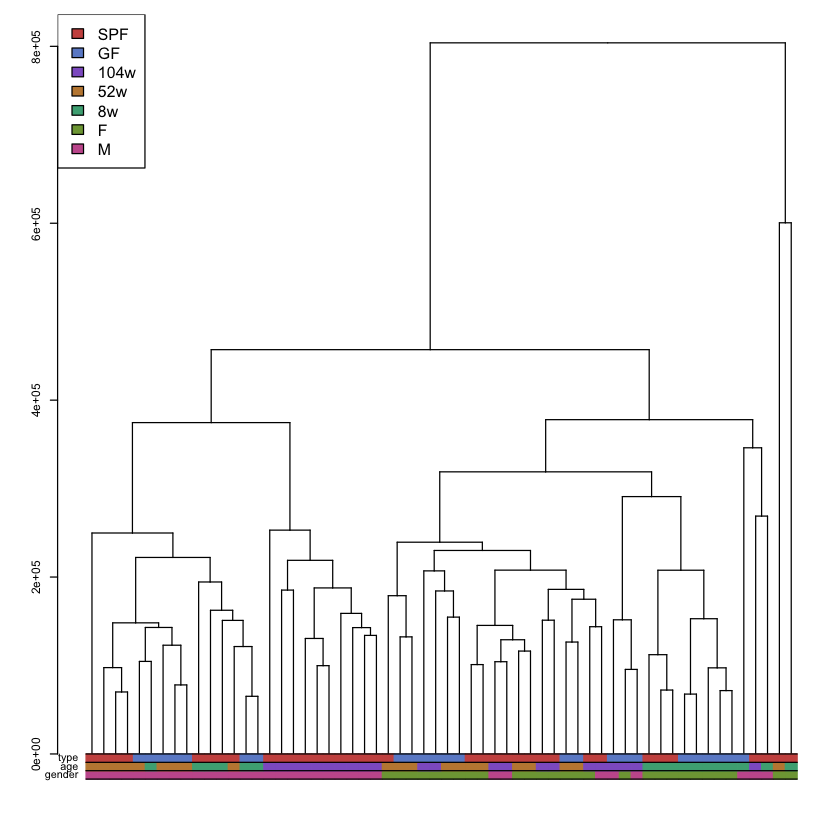

In [6]:
sampleTree = as.dendrogram(hclust(dist(t(norm_counts)), method = "average"))
par(mar = c(4,4,1,1))
par(cex = 0.6)
plot(sampleTree, leaflab="none")
colored_bars(colors, sampleTree, rowLabels = c("gender", "age","type"),y_shift=0.5)
legend("topleft",
        fill=c(color_SPF,color_GF,color_104w,color_52w,color_8w,color_F,color_M),
        c("SPF","GF","104w","52w","8w","F","M"),
        cex=0.8)

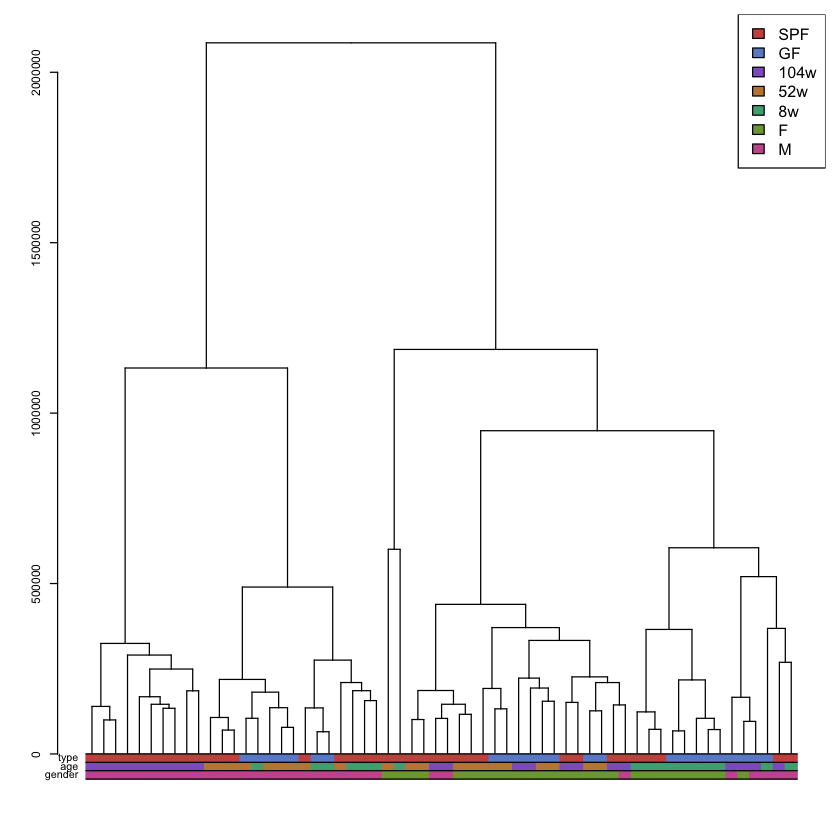

In [7]:
sampleTree = as.dendrogram(hclust(dist(t(norm_counts)), method = "ward.D2"))
par(mar = c(4,4,1,1))
par(cex = 0.6)
plot(sampleTree, leaflab="none")
colored_bars(colors, sampleTree, rowLabels = c("gender", "age","type"),y_shift=0.5)
legend("topright",
        fill=c(color_SPF,color_GF,color_104w,color_52w,color_8w,color_F,color_M),
        c("SPF","GF","104w","52w","8w","F","M"),
        cex=0.8)

## Without X/Y genes

In [8]:
annot = read.table("../data/mm10_UCSC_07_15_genes.gtf", sep="\t")
chrX_chrY_desc = annot[annot$V1 == 'chrX' | annot$V1 == 'chrX_GL456233_random' | annot$V1 == 'chrY',9]
chrX_chrY_genes = unique(sapply(sapply(as.character(chrX_chrY_desc), strsplit, split = " |;"),function(i) i[2]))

In [9]:
chrX_chrY_counts = norm_counts[which(rownames(norm_counts) %in% chrX_chrY_genes),]
non_chrX_chrY_counts = norm_counts[-which(rownames(norm_counts) %in% chrX_chrY_genes),]

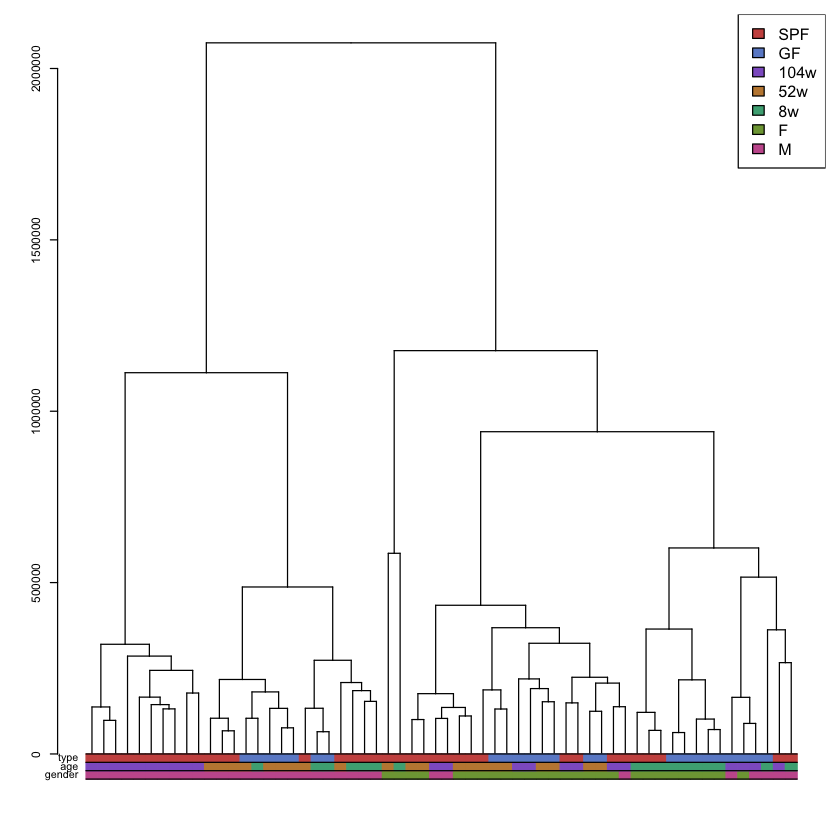

In [10]:
sampleTree = as.dendrogram(hclust(dist(t(non_chrX_chrY_counts)), method = "ward.D2"))
par(mar = c(4,4,1,1))
par(cex = 0.6)
plot(sampleTree, leaflab="none")
colored_bars(colors, sampleTree, rowLabels = c("gender", "age","type"),y_shift=0.5)
legend("topright",
        fill=c(color_SPF,color_GF,color_104w,color_52w,color_8w,color_F,color_M),
        c("SPF","GF","104w","52w","8w","F","M"),
        cex=0.8)

# Gene co-expression network analysis


## Build network

In [11]:
# Filter genes that have a count > 10 in more than 90% of the samples
dim(norm_counts)
to_keep = rownames(norm_counts)[which(rowSums(norm_counts > 10)>0.9*dim(norm_counts)[2])]
filtered_norm_counts = norm_counts[to_keep,]
dim(filtered_norm_counts)
gene_names = rownames(filtered_norm_counts)

[1] 24421    60

[1] 10219    60

pickSoftThreshold: will use block size 4378.
 pickSoftThreshold: calculating connectivity for given powers...
   ..working on genes 1 through 4378 of 10219
   ..working on genes 4379 through 8756 of 10219
   ..working on genes 8757 through 10219 of 10219
   Power SFT.R.sq  slope truncated.R.sq  mean.k. median.k.  max.k.
1      2    0.144 -0.617          0.901 644.0000  6.20e+02 1390.00
2      4    0.691 -1.460          0.964 114.0000  9.21e+01  438.00
3      6    0.783 -1.840          0.970  31.1000  1.94e+01  198.00
4      8    0.790 -2.020          0.962  11.0000  5.03e+00  106.00
5     10    0.832 -1.990          0.985   4.6100  1.49e+00   63.10
6     12    0.851 -1.960          0.988   2.1900  4.90e-01   40.10
7     14    0.876 -1.890          0.988   1.1500  1.72e-01   26.70
8     16    0.886 -1.820          0.971   0.6430  6.43e-02   18.40
9     18    0.899 -1.780          0.970   0.3830  2.50e-02   13.60
10    20    0.882 -1.770          0.946   0.2400  1.02e-02   10.40
11    22

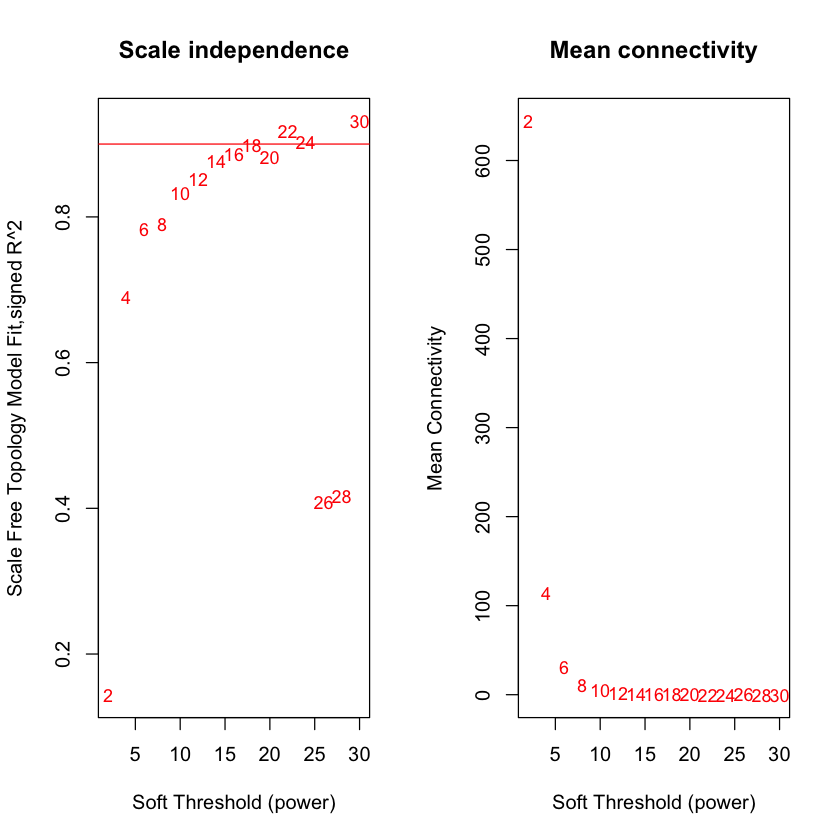

In [12]:
# Choosing the soft-thresholding power
powers = seq(from = 2, to=30, by=2)
sft = pickSoftThreshold(t(filtered_norm_counts), powerVector = powers, verbose = 5)
par(mfrow = c(1,2))
cex1 = 0.9
# Scale-free topology fit index as a function of the soft-thresholding power
plot(sft$fitIndices[,1],
     -sign(sft$fitIndices[,3])*sft$fitIndices[,2],
     xlab="Soft Threshold (power)",
     ylab="Scale Free Topology Model Fit,signed R^2",
     type="n",
     main = paste("Scale independence"))
text(sft$fitIndices[,1],
     -sign(sft$fitIndices[,3])*sft$fitIndices[,2],
     labels=powers,
     cex=cex1,
     col="red");
# this line corresponds to using an R^2 cut-off of h
abline(h=0.90,col="red")
# Mean connectivity as a function of the soft-thresholding power
plot(sft$fitIndices[,1],
     sft$fitIndices[,5],
     xlab="Soft Threshold (power)",
     ylab="Mean Connectivity",
     type="n",
     main = paste("Mean connectivity"))
text(sft$fitIndices[,1], sft$fitIndices[,5], labels=powers, cex=cex1,col="red")

Parameters for network construction
- Soft-thresholding power parameter: 16
- Minimum module size: 30
- Height for module merging: 0.2 (below)
- Biweight Midcorrelation

In [13]:
soft_thresholding_power = 16

In [14]:
head(t(filtered_norm_counts))

ERROR while rich displaying an object: Error in sprintf(wrap, header, body): 'fmt' length exceeds maximal format length 8192

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     rpr <- mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     rpr <- mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. mime2repr[[mime]](obj)
8. repr_latex.matrix(obj)
9. repr_matrix_generic(obj, sprintf("\\begin{tabular}{%s}\n%%s%%s\\end{tabular}\n", 
 .     cols), "%s\\\\\n\\hline\n", "  &", " %s &", "%s", "\t%s\\\\\n", 
 .     "%s &", " %s &", escape_fun = latex_escape_vec, ...)
10. sprintf(wrap

0610007P14Rik 0610009B22Rik 0610009L18Rik 0610009O20Rik
GF_104w_F_1_2 868.4015      1021.328      28.21850      217.5555     
GF_104w_F_2_2 749.6493      1169.197      36.20465      278.9888     
GF_104w_F_3_2 910.3535      1180.999      18.22530      266.0893     
GF_104w_M_1_2 886.0650      1224.750      20.33882      226.3799     
GF_104w_M_2_2 992.9136      1558.314      38.40693      271.9966     
GF_52w_M_1_2  508.5064      1038.902      31.99212      299.7157     
              0610010F05Rik 0610010K14Rik Mettl26  0610012G03Rik 0610030E20Rik
GF_104w_F_1_2 411.4439      1351.757      283.0953 693.6289       899.3508    
GF_104w_F_2_2 461.0769      1516.336      207.6443 686.8236       759.2329    
GF_104w_F_3_2 288.8709      1852.601      222.3486 868.4353       540.3800    
GF_104w_M_1_2 278.5534      1551.056      190.1237 823.2799       525.2720    
GF_104w_M_2_2 304.1073      1911.532      243.0340 778.8422       707.6949    
GF_52w_M_1_2  392.3244      1173.606      182.6919 589.3286      1047.3210    
              0610037L13Rik ⋯ Zw10     Zwint    Zxda     Zxdb     Zxdc     
GF_104w_F_1_2 449.6754      ⋯ 618.0761 1471.913 297.6596 130.1692  923.9282
GF_104w_F_2_2 526.0323      ⋯ 797.5672 1539.763 243.8490 198.0607  981.7850
GF_104w_F_3_2 444.6972      ⋯ 731.7456 1375.099 153.0925 171.3178  922.1999
GF_104w_M_1_2 607.5116      ⋯ 466.9085 1752.675 172.4378 344.8756  683.5611
GF_104w_M_2_2 586.8075      ⋯ 878.3224 1957.494 147.9611 249.3302 1003.6172
GF_52w_M_1_2  621.3207      ⋯ 768.6528 1397.551 287.9291 275.3006  924.4039
              Zyg11b   Zyx      Zzef1    Zzz3      Hikeshi 
GF_104w_F_1_2 1333.552 2864.633 396.8795  752.7967 668.1412
GF_104w_F_2_2 1340.637 3358.514 364.1762  597.3768 703.8610
GF_104w_F_3_2 1181.910 3058.205 209.5909  644.2642 770.9300
GF_104w_M_1_2 1295.494 2789.955 261.7517  944.4285 687.9826
GF_104w_M_2_2 1205.726 2819.446 200.8494  785.1384 583.6594
GF_52w_M_1_2  1674.535 2206.614 749.2892 1163.5029 493.3522

In [15]:
# Block-wise network construction and module detection
bwnet = blockwiseModules(t(filtered_norm_counts),
                 checkMissingData = TRUE,
                 maxBlockSize = 5000,
                 power = soft_thresholding_power,
                 TOMType = "signed",
                 numericLabels = TRUE,
                 saveTOMs = TRUE,
                 saveTOMFileBase = "norm_genes_TOM",
                 mergeCutHeight = 0.2, 
                 verbose=3,
                 corType="bicor",
                 maxPOutliers=0,
                 minModuleSize = 30)

 Calculating module eigengenes block-wise from all genes
   Flagging genes and samples with too many missing values...
    ..step 1
 ....pre-clustering genes to determine blocks..
   Projective K-means:
   ..k-means clustering..
   ..merging smaller clusters...
Block sizes:
gBlocks
   1    2    3 
4997 4015 1207 
 ..Working on block 1 .
    TOM calculation: adjacency..
    ..will use 4 parallel threads.
     Fraction of slow calculations: 0.000000
    ..connectivity..
    ..matrix multiplication (system BLAS)..
    ..normalization..
    ..done.
   ..saving TOM for block 1 into file norm_genes_TOM-block.1.RData
 ....clustering..
 ....detecting modules..
 ....calculating module eigengenes..
 ....checking kME in modules..
 ..Working on block 2 .
    TOM calculation: adjacency..
    ..will use 4 parallel threads.
     Fraction of slow calculations: 0.000000
    ..connectivity..
    ..matrix multiplication (system BLAS)..
    ..normalization..
    ..done.
   ..saving TOM for block 2 into fi

In [16]:
# Modules
table(bwnet$colors)
module_nb = dim(table(bwnet$colors))-1
module_nb


   0    1    2    3    4    5    6    7    8    9   10   11 
8786  446  260  191   95   93   86   62   56   53   49   42 

[1] 11

- 11 modules with between 42 and 446 genes 
- 8786 genes not assigned to a module

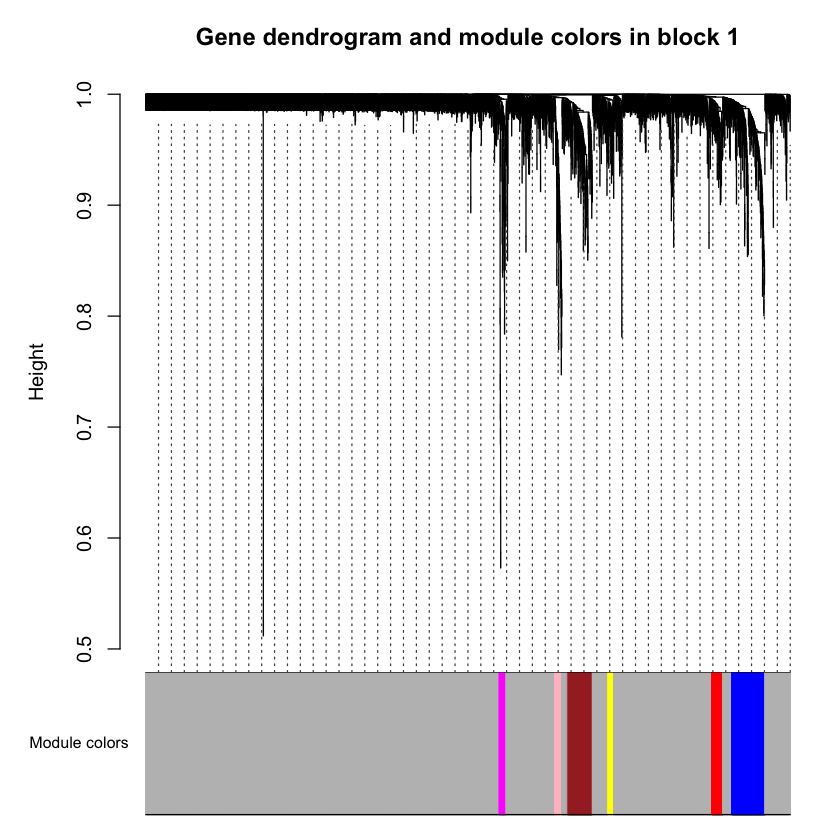

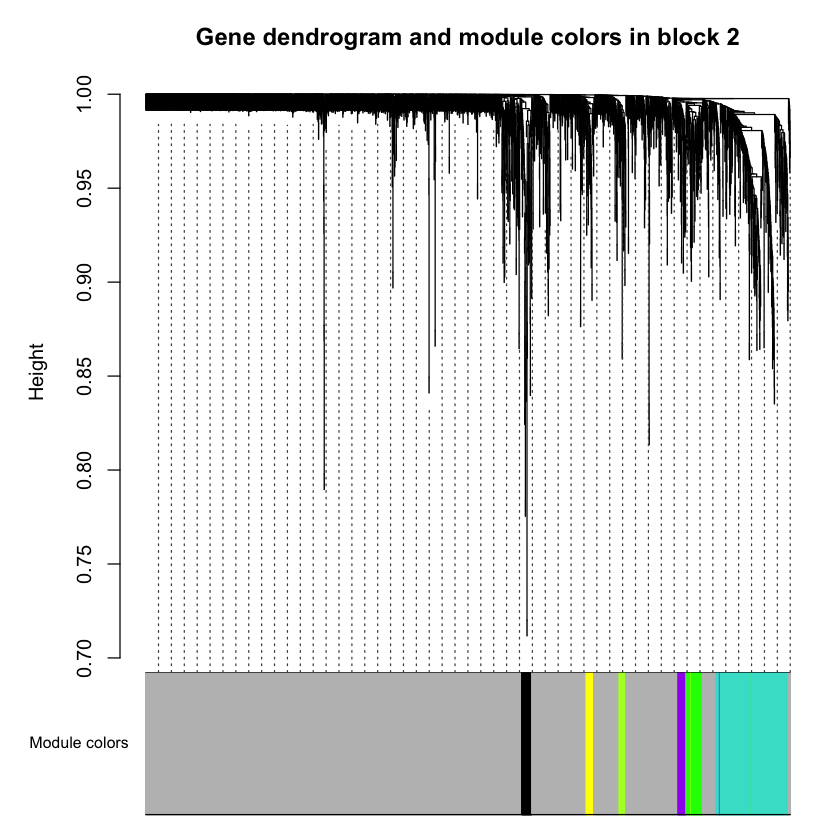

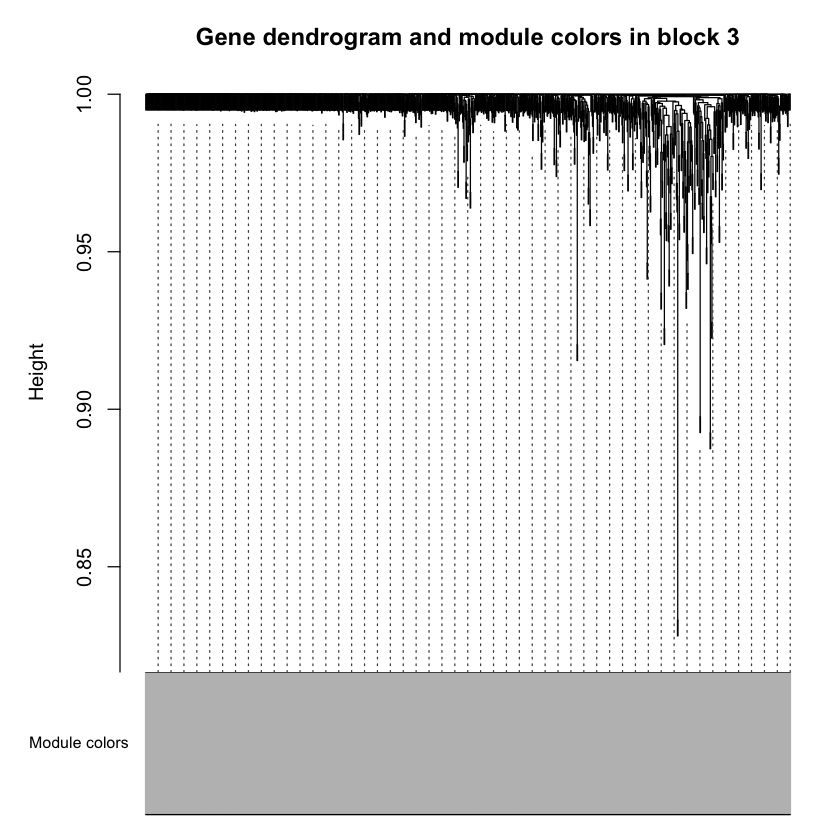

In [17]:
# Plot the dendrogram and the module colors underneath for the 3 blocks
bwModuleColors = labels2colors(bwnet$colors)
plotDendroAndColors(bwnet$dendrograms[[1]],
                    bwModuleColors[bwnet$blockGenes[[1]]],
                    "Module colors",
                    main = "Gene dendrogram and module colors in block 1",
                    dendroLabels = FALSE,
                    hang = 0.03,
                    addGuide = TRUE,
                    guideHang = 0.05)
plotDendroAndColors(bwnet$dendrograms[[2]],
                    bwModuleColors[bwnet$blockGenes[[2]]],
                    "Module colors",
                    main = "Gene dendrogram and module colors in block 2",
                    dendroLabels = FALSE,
                    hang = 0.03,
                    addGuide = TRUE,
                    guideHang = 0.05)
plotDendroAndColors(bwnet$dendrograms[[3]],
                    bwModuleColors[bwnet$blockGenes[[3]]],
                    "Module colors",
                    main = "Gene dendrogram and module colors in block 3",
                    dendroLabels = FALSE,
                    hang = 0.03,
                    addGuide = TRUE,
                    guideHang = 0.05)

In [18]:
# Get genes that are in one module
in_mod = is.finite(match(bwnet$colors, seq(1:module_nb)))
mod_genes = gene_names[in_mod]
length(mod_genes)
sum(in_mod)

[1] 1433

[1] 1433

## Network visualization

In [19]:
# Get the Topological Overlap Matrix (TOM)
TOM = TOMsimilarityFromExpr(t(filtered_norm_counts), power = soft_thresholding_power)

TOM calculation: adjacency..
..will use 4 parallel threads.
 Fraction of slow calculations: 0.000000
..connectivity..
..matrix multiplication (system BLAS)..
..normalization..
..done.


In [20]:
# Filter TOM for the genes in the modules
mod_TOM = TOM[in_mod, in_mod]
dimnames(mod_TOM) = list(mod_genes, mod_genes)
#mod_TOM = TOM
#gene_names = rownames(filtered_norm_counts)
#dimnames(mod_TOM) = list(gene_names,gene_names)

In [21]:
# Transform into adjency matrix while keeping gene connection if the value > 0.005
adjency = (as.matrix(mod_TOM)>0.005)*1
head(adjency)

0610030E20Rik 1600020E01Rik Zfp974 1700094D03Rik 1700112E06Rik
0610030E20Rik 1             1             0      0             0            
1600020E01Rik 1             1             0      1             0            
Zfp974        0             0             1      0             0            
1700094D03Rik 0             1             0      1             0            
1700112E06Rik 0             0             0      0             1            
1810026B05Rik 1             1             0      1             0            
              1810026B05Rik Ndufaf8 2010107E04Rik 2210016L21Rik 2310033P09Rik ⋯
0610030E20Rik 1             0       0             0             0             ⋯
1600020E01Rik 1             0       0             0             0             ⋯
Zfp974        0             0       0             0             0             ⋯
1700094D03Rik 1             0       0             0             0             ⋯
1700112E06Rik 0             0       0             0             0             ⋯
1810026B05Rik 1             0       0             0             0             ⋯
              Zmpste24 Zmym6 Znhit2 Znrd1 Znrf1 Znrf2 Zrsr2 Zscan26 Zswim8
0610030E20Rik 0        0     0      0     0     0     0     1       0     
1600020E01Rik 0        1     0      0     1     0     0     1       1     
Zfp974        0        0     1      0     0     0     0     0       0     
1700094D03Rik 0        1     0      0     0     0     0     1       0     
1700112E06Rik 0        0     0      0     0     0     0     0       0     
1810026B05Rik 0        1     0      0     1     0     0     1       1     
              Zzef1
0610030E20Rik 0    
1600020E01Rik 0    
Zfp974        0    
1700094D03Rik 0    
1700112E06Rik 0    
1810026B05Rik 0

In [22]:
# Transform adjency matrix into network
net = graph_from_adjacency_matrix(adjency, diag = FALSE, weighted = TRUE, mode="undirected")
save(net, file = "../results/dge/dge_net.RData")

In [23]:
# Get node colors = module color
mod_colors = bwnet$colors
names(mod_colors) = gene_names
#head(mod_colors)
connected_gene_colors = mod_colors[in_mod]
save(connected_gene_colors, file = "../results/dge/dge_net_connected_gene_colors.RData")

In [24]:
pal2 = c("#c15942",
"#7ecf56",
"#844ac1",
"#cdb353",
"#c95393",
"#8cc9ae",
"#4e304c",
"#57623c",
"#9598c3")
pal2 = c("#c64944",
"#72d367",
"#8f4bcb",
"#c9ce4e",
"#be5395",
"#5a7940",
"#797dbb",
"#c3823b",
"#79c4c0",
"#6a5352",
"#d2b9a0")
save(pal2, file = "../results/dge/dge_net_pal2.RData")

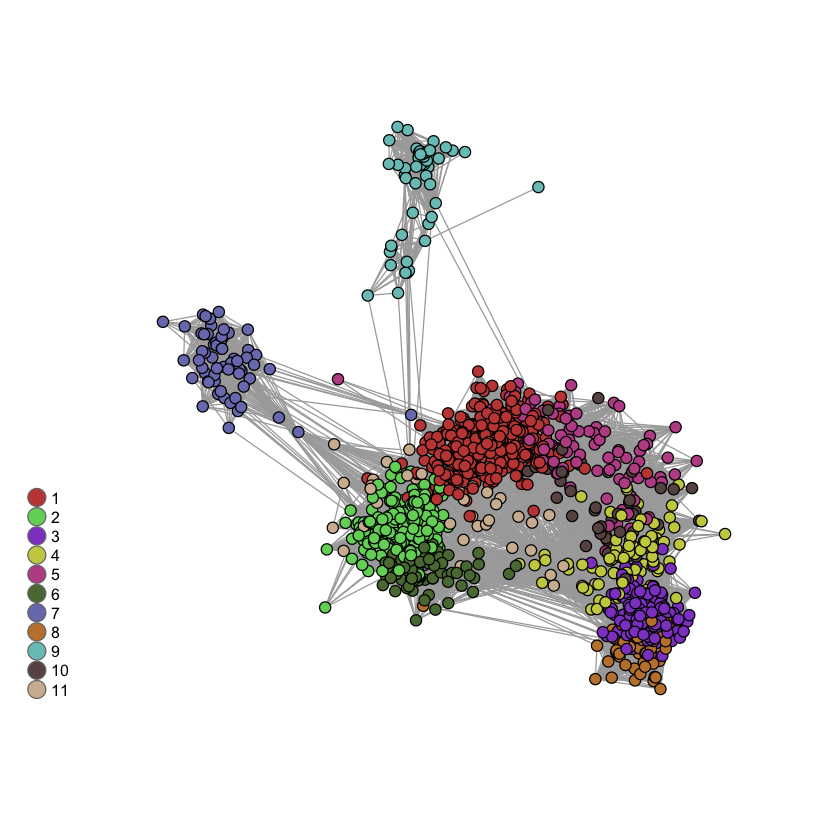

In [25]:
# Plot network
layout = layout_with_fr(net)
plot(net, 
     vertex.label=NA,
     vertex.size=4,
     vertex.color=pal2[connected_gene_colors],
     layout=layout)
legend(x=-1.5, y=-0.25, 1:module_nb, pch=21,col="#777777", pt.bg=pal2, pt.cex=2, cex=.8, bty="n", ncol=1)
#layout = layout_with_fr(net)
#save(layout, file = "../results/dge/dge_layout.RData")

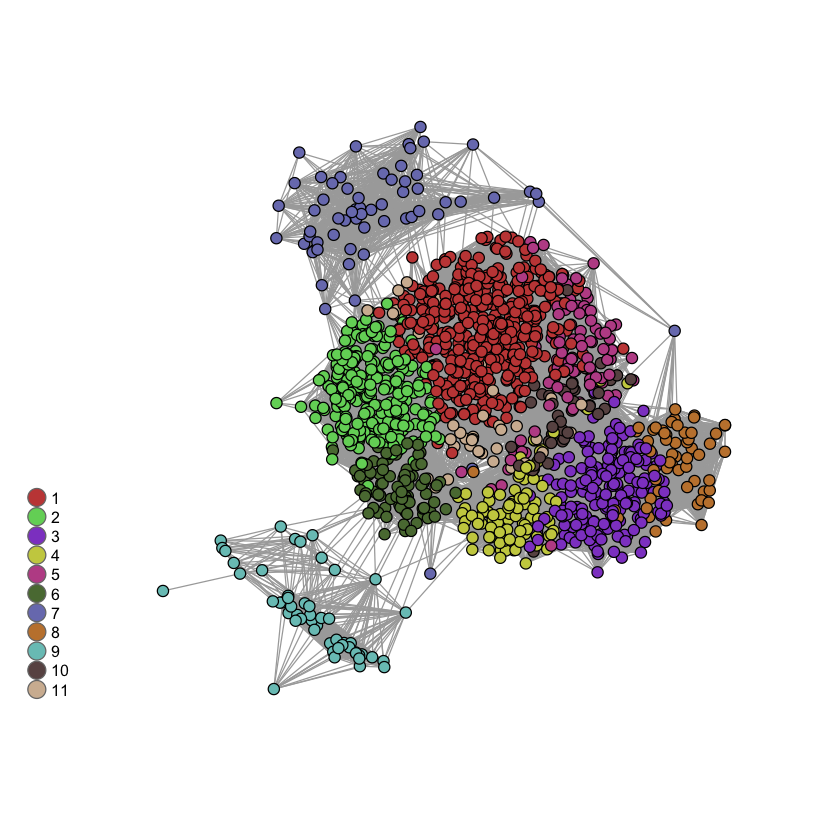

In [26]:
# Plot network
layout = layout_with_kk(net)
plot(net, 
     vertex.label=NA,
     vertex.size=4,
     vertex.color=pal2[mod_colors],
     layout=layout)
legend(x=-1.5, y=-0.25, 1:module_nb, pch=21,col="#777777", pt.bg=pal2, pt.cex=2, cex=.8, bty="n", ncol=1)
save(layout, file = "../results/dge/dge_layout.RData")

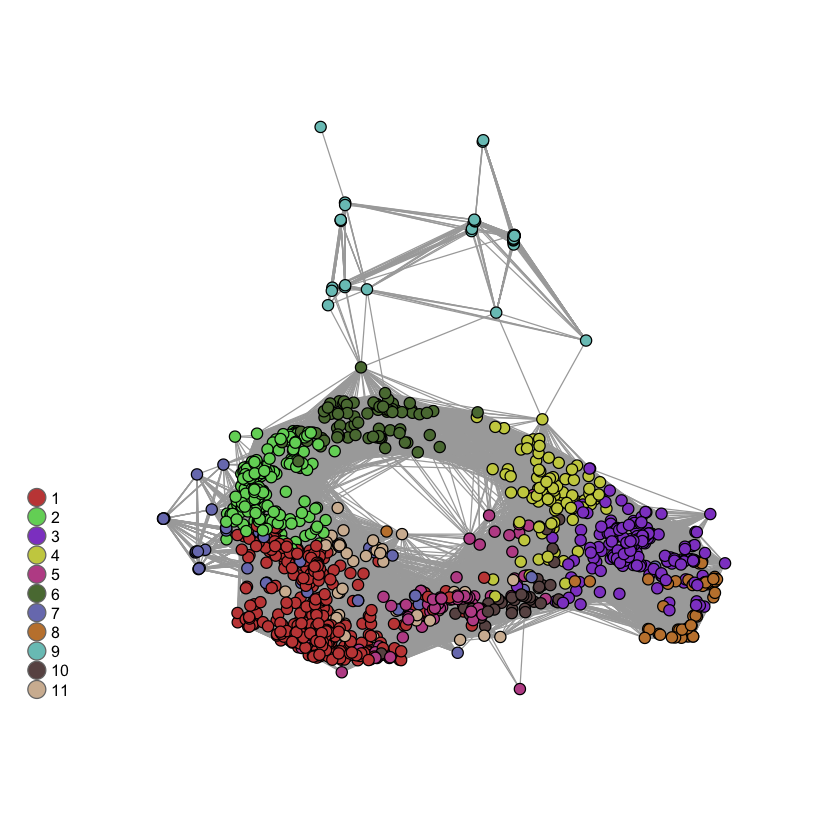

In [27]:
# Plot network
layout = layout_with_mds(net)
plot(net, 
     vertex.label=NA,
     vertex.size=4,
     vertex.color=pal2[mod_colors],
     layout=layout)
legend(x=-1.5, y=-0.25, 1:module_nb, pch=21,col="#777777", pt.bg=pal2, pt.cex=2, cex=.8, bty="n", ncol=1)

In [28]:
layout = layout_with_kk(net)

## Module analysis

In [29]:
module_genes = names(connected_gene_colors)[which(connected_gene_colors == 1)]
length(module_genes)

[1] 446

In [30]:
all_genes = rownames(norm_counts)

In [31]:
module_gene_list = list()
for(i in 1:module_nb){
    print(i)
    module_genes = names(connected_gene_colors)[which(connected_gene_colors == i)]
    module_gene_bool = all_genes %in% module_genes
    names(module_gene_bool) = all_genes
    head(module_gene_bool)
    module_gene_list[[i]] = module_genes
    pwf = suppressMessages(nullp(module_gene_bool, 'mm10', 'geneSymbol', plot.fit=F))                        
    GO_wall = goseq(pwf,'mm10', 'geneSymbol')
    adj_GO_wall = GO_wall[p.adjust(GO_wall[,"over_represented_pvalue"],method="BH")<.05,]
    print(head(adj_GO_wall[adj_GO_wall$ontology == "BP",]))
}

[1] 1


Warning message in grep(txdbPattern, installedPackages):
“argument 'pattern' has length > 1 and only the first element will be used”Warning message in pcls(G):
“initial point very close to some inequality constraints”Fetching GO annotations...
For 2918 genes, we could not find any categories. These genes will be excluded.
To force their use, please run with use_genes_without_cat=TRUE (see documentation).
This was the default behavior for version 1.15.1 and earlier.
Calculating the p-values...
'select()' returned 1:1 mapping between keys and columns


        category over_represented_pvalue under_represented_pvalue numDEInCat
3121  GO:0006325            1.535024e-17                        1         59
5998  GO:0016569            1.552323e-14                        1         48
4834  GO:0010467            2.180602e-13                        1        177
5999  GO:0016570            8.098099e-13                        1         40
9705  GO:0034641            9.689717e-13                        1        194
14200 GO:0051171            1.033361e-12                        1        156
      numInCat                                              term ontology
3121       683                            chromatin organization       BP
5998       489                            chromatin modification       BP
4834      4726                                   gene expression       BP
5999       384                              histone modification       BP
9705      5508      cellular nitrogen compound metabolic process       BP
14200     3783 re

Warning message in grep(txdbPattern, installedPackages):
“argument 'pattern' has length > 1 and only the first element will be used”Warning message in pcls(G):
“initial point very close to some inequality constraints”Fetching GO annotations...
For 2918 genes, we could not find any categories. These genes will be excluded.
To force their use, please run with use_genes_without_cat=TRUE (see documentation).
This was the default behavior for version 1.15.1 and earlier.
Calculating the p-values...
'select()' returned 1:1 mapping between keys and columns


        category over_represented_pvalue under_represented_pvalue numDEInCat
9908  GO:0034976            3.637326e-08                1.0000000         16
3468  GO:0006810            1.089150e-07                1.0000000         94
5357  GO:0015031            1.267559e-07                1.0000000         50
14240 GO:0051234            3.386036e-07                1.0000000         95
12359 GO:0045184            6.817248e-07                0.9999997         52
13425 GO:0048193            9.479241e-07                0.9999998         14
      numInCat                                     term ontology
9908       204 response to endoplasmic reticulum stress       BP
3468      4082                                transport       BP
5357      1649                        protein transport       BP
14240     4231            establishment of localization       BP
12359     1809    establishment of protein localization       BP
13425      186                  Golgi vesicle transport       BP
[1] 3


Warning message in grep(txdbPattern, installedPackages):
“argument 'pattern' has length > 1 and only the first element will be used”Fetching GO annotations...
For 2918 genes, we could not find any categories. These genes will be excluded.
To force their use, please run with use_genes_without_cat=TRUE (see documentation).
This was the default behavior for version 1.15.1 and earlier.
Calculating the p-values...
'select()' returned 1:1 mapping between keys and columns


        category over_represented_pvalue under_represented_pvalue numDEInCat
3468  GO:0006810            2.086915e-24                        1         82
14240 GO:0051234            2.515869e-24                        1         83
14206 GO:0051179            6.256614e-24                        1         92
14955 GO:0055114            9.097327e-22                        1         43
12773 GO:0046034            6.631370e-20                        1         24
4467  GO:0009167            3.481026e-19                        1         24
      numInCat                                                  term ontology
3468      4082                                             transport       BP
14240     4231                         establishment of localization       BP
14206     5342                                          localization       BP
14955      883                           oxidation-reduction process       BP
12773      181                                 ATP metabolic process   

Warning message in grep(txdbPattern, installedPackages):
“argument 'pattern' has length > 1 and only the first element will be used”Warning message in pcls(G):
“initial point very close to some inequality constraints”Fetching GO annotations...
For 2918 genes, we could not find any categories. These genes will be excluded.
To force their use, please run with use_genes_without_cat=TRUE (see documentation).
This was the default behavior for version 1.15.1 and earlier.
Calculating the p-values...
'select()' returned 1:1 mapping between keys and columns


[1] category                 over_represented_pvalue  under_represented_pvalue
[4] numDEInCat               numInCat                 term                    
[7] ontology                
<0 rows> (or 0-length row.names)
[1] 5


Warning message in grep(txdbPattern, installedPackages):
“argument 'pattern' has length > 1 and only the first element will be used”Warning message in pcls(G):
“initial point very close to some inequality constraints”Fetching GO annotations...
For 2918 genes, we could not find any categories. These genes will be excluded.
To force their use, please run with use_genes_without_cat=TRUE (see documentation).
This was the default behavior for version 1.15.1 and earlier.
Calculating the p-values...
'select()' returned 1:1 mapping between keys and columns


[1] category                 over_represented_pvalue  under_represented_pvalue
[4] numDEInCat               numInCat                 term                    
[7] ontology                
<0 rows> (or 0-length row.names)
[1] 6


Warning message in grep(txdbPattern, installedPackages):
“argument 'pattern' has length > 1 and only the first element will be used”Warning message in pcls(G):
“initial point very close to some inequality constraints”Fetching GO annotations...
For 2918 genes, we could not find any categories. These genes will be excluded.
To force their use, please run with use_genes_without_cat=TRUE (see documentation).
This was the default behavior for version 1.15.1 and earlier.
Calculating the p-values...
'select()' returned 1:1 mapping between keys and columns


[1] category                 over_represented_pvalue  under_represented_pvalue
[4] numDEInCat               numInCat                 term                    
[7] ontology                
<0 rows> (or 0-length row.names)
[1] 7


Warning message in grep(txdbPattern, installedPackages):
“argument 'pattern' has length > 1 and only the first element will be used”Fetching GO annotations...
For 2918 genes, we could not find any categories. These genes will be excluded.
To force their use, please run with use_genes_without_cat=TRUE (see documentation).
This was the default behavior for version 1.15.1 and earlier.
Calculating the p-values...
'select()' returned 1:1 mapping between keys and columns


        category over_represented_pvalue under_represented_pvalue numDEInCat
1052  GO:0002376                       0                        1         39
1090  GO:0002443                       0                        1         12
4626  GO:0009615                       0                        1         14
9407  GO:0034097                       0                        1         16
14463 GO:0051607                       0                        1         12
16706 GO:0071345                       0                        1         15
      numInCat                                   term ontology
1052      2158                  immune system process       BP
1090       290            leukocyte mediated immunity       BP
4626       307                      response to virus       BP
9407       553                   response to cytokine       BP
14463      269              defense response to virus       BP
16706      458 cellular response to cytokine stimulus       BP
[1] 8


Warning message in grep(txdbPattern, installedPackages):
“argument 'pattern' has length > 1 and only the first element will be used”Fetching GO annotations...
For 2918 genes, we could not find any categories. These genes will be excluded.
To force their use, please run with use_genes_without_cat=TRUE (see documentation).
This was the default behavior for version 1.15.1 and earlier.
Calculating the p-values...
'select()' returned 1:1 mapping between keys and columns


       category over_represented_pvalue under_represented_pvalue numDEInCat
15   GO:0000028                       0                        1          7
936  GO:0002181                       0                        1          9
3177 GO:0006412                       0                        1         40
3251 GO:0006518                       0                        1         40
3465 GO:0006807                       0                        1         46
3974 GO:0008152                       0                        1         46
     numInCat                                term ontology
15         19    ribosomal small subunit assembly       BP
936        49             cytoplasmic translation       BP
3177      597                         translation       BP
3251      738           peptide metabolic process       BP
3465     5831 nitrogen compound metabolic process       BP
3974     9868                   metabolic process       BP
[1] 9


Warning message in grep(txdbPattern, installedPackages):
“argument 'pattern' has length > 1 and only the first element will be used”Warning message in pcls(G):
“initial point very close to some inequality constraints”Fetching GO annotations...
For 2918 genes, we could not find any categories. These genes will be excluded.
To force their use, please run with use_genes_without_cat=TRUE (see documentation).
This was the default behavior for version 1.15.1 and earlier.
Calculating the p-values...
'select()' returned 1:1 mapping between keys and columns


[1] category                 over_represented_pvalue  under_represented_pvalue
[4] numDEInCat               numInCat                 term                    
[7] ontology                
<0 rows> (or 0-length row.names)
[1] 10


Warning message in grep(txdbPattern, installedPackages):
“argument 'pattern' has length > 1 and only the first element will be used”Warning message in pcls(G):
“initial point very close to some inequality constraints”Fetching GO annotations...
For 2918 genes, we could not find any categories. These genes will be excluded.
To force their use, please run with use_genes_without_cat=TRUE (see documentation).
This was the default behavior for version 1.15.1 and earlier.
Calculating the p-values...
'select()' returned 1:1 mapping between keys and columns


[1] category                 over_represented_pvalue  under_represented_pvalue
[4] numDEInCat               numInCat                 term                    
[7] ontology                
<0 rows> (or 0-length row.names)
[1] 11


Warning message in grep(txdbPattern, installedPackages):
“argument 'pattern' has length > 1 and only the first element will be used”Warning message in pcls(G):
“initial point very close to some inequality constraints”Fetching GO annotations...
For 2918 genes, we could not find any categories. These genes will be excluded.
To force their use, please run with use_genes_without_cat=TRUE (see documentation).
This was the default behavior for version 1.15.1 and earlier.
Calculating the p-values...
'select()' returned 1:1 mapping between keys and columns


        category over_represented_pvalue under_represented_pvalue numDEInCat
14475 GO:0051641            4.691842e-07                0.9999999         17
9687  GO:0034613            4.023301e-06                0.9999994         13
16411 GO:0070727            4.372873e-06                0.9999993         13
3940  GO:0008104            5.268680e-06                0.9999990         16
12359 GO:0045184            7.691099e-06                0.9999987         14
14206 GO:0051179            1.682391e-05                0.9999959         24
      numInCat                                  term ontology
14475     2172                 cellular localization       BP
9687      1453         cellular protein localization       BP
16411     1464   cellular macromolecule localization       BP
3940      2291                  protein localization       BP
12359     1809 establishment of protein localization       BP
14206     5342                          localization       BP


In [32]:
capture.output(module_gene_list, file = "../results/dge/genes_in_modules")

In [33]:
graphjs(net,
        layout=layout_with_fr(net, dim=3),
        height=500,
        vertex.size=1,
        vertex.color=as.vector(pal2[connected_gene_colors]),
        vertex.shape="sphere",
        vertex.label=as.vector(names(connected_gene_colors)),
        edge.color="grey")

HTML widgets cannot be represented in plain text (need html)

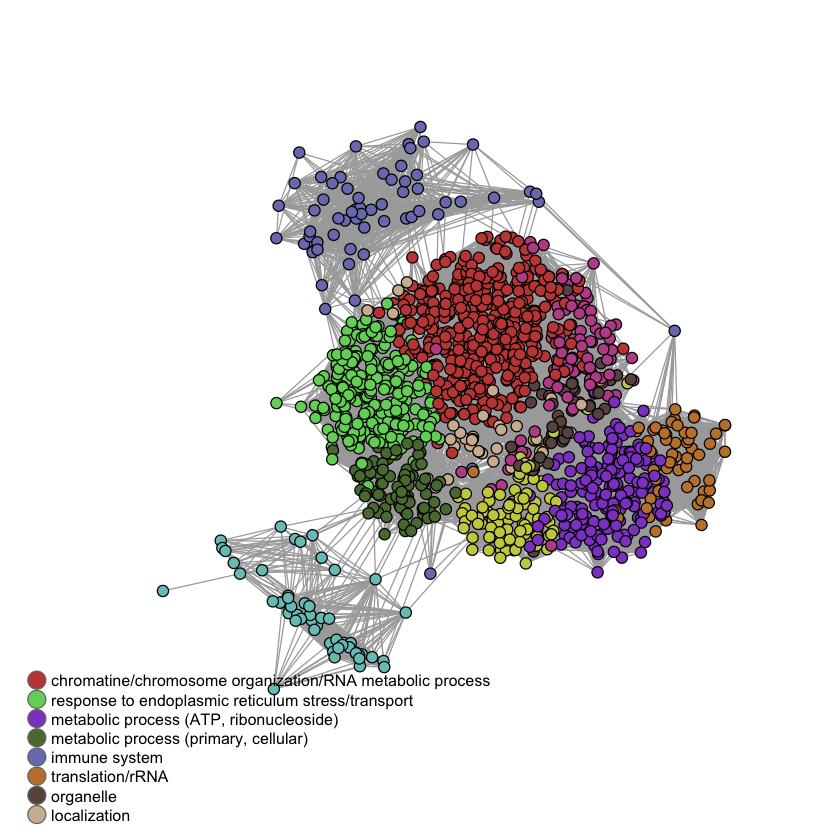

In [34]:
# Plot network
plot_net_with_layout(net, connected_gene_colors, pal2, layout)

In [35]:
for(mod_id in 1:11){
    module_genes = names(connected_gene_colors)[which(connected_gene_colors==mod_id)]
    chX_chrY_nb = sum(module_genes %in% rownames(chrX_chrY_counts))   
    print(paste(mod_id, ": ", chX_chrY_nb, " - ", 100*chX_chrY_nb/length(module_genes), "%", sep=""))
}

[1] "1: 12 - 2.69058295964126%"
[1] "2: 14 - 5.38461538461539%"
[1] "3: 6 - 3.1413612565445%"
[1] "4: 1 - 1.05263157894737%"
[1] "5: 1 - 1.0752688172043%"
[1] "6: 4 - 4.65116279069767%"
[1] "7: 2 - 3.2258064516129%"
[1] "8: 2 - 3.57142857142857%"
[1] "9: 2 - 3.77358490566038%"
[1] "10: 0 - 0%"
[1] "11: 0 - 0%"


# Median of gene counts in the modules over ages

In [36]:
metadata = t(sapply(sapply(colnames(norm_counts), strsplit, split = "_"), unlist))
metadata = metadata[,-5]
colnames(metadata) = c("type", "age", "gender", "replicate")
sample_order = rownames(metadata)[order(metadata[,'age'], metadata[,'type'], metadata[,'gender'], decreasing = T)]
metadata = metadata[sample_order,]

In [37]:
plot_module_count = function(mod_id, norm_counts, connected_gene_colors, sample_order){
    module_genes = names(connected_gene_colors)[which(connected_gene_colors==mod_id)]
    module_genes = module_genes[module_genes %in% rownames(norm_counts)]
    module_counts = norm_counts[module_genes, sample_order]
    mat = data.frame(samples = as.factor(colnames(module_counts)),
                 type = as.factor(metadata[sample_order, 'type']),
                 age = as.factor(metadata[sample_order, 'age']),
                 gender = as.factor(metadata[sample_order, 'gender']),
                 type_gender = as.factor(paste(metadata[sample_order, 'type'], metadata[sample_order, 'gender'])),
                 mean = apply(module_counts,2,mean),
                 sd = apply(module_counts,2,sd),
                 median = apply(module_counts,2,median),
                 row.names = NULL)
    mat$samples = factor(mat$samples, levels = colnames(module_counts))
    p = ggplot(mat, aes(x=samples, y=median, group = type_gender, color = age)) +
      geom_point() + 
      theme(axis.text.x = element_blank()) +
      facet_grid(gender ~ type)
    p
}

Module 1: chromatine/chromosome organization/RNA metabolic process

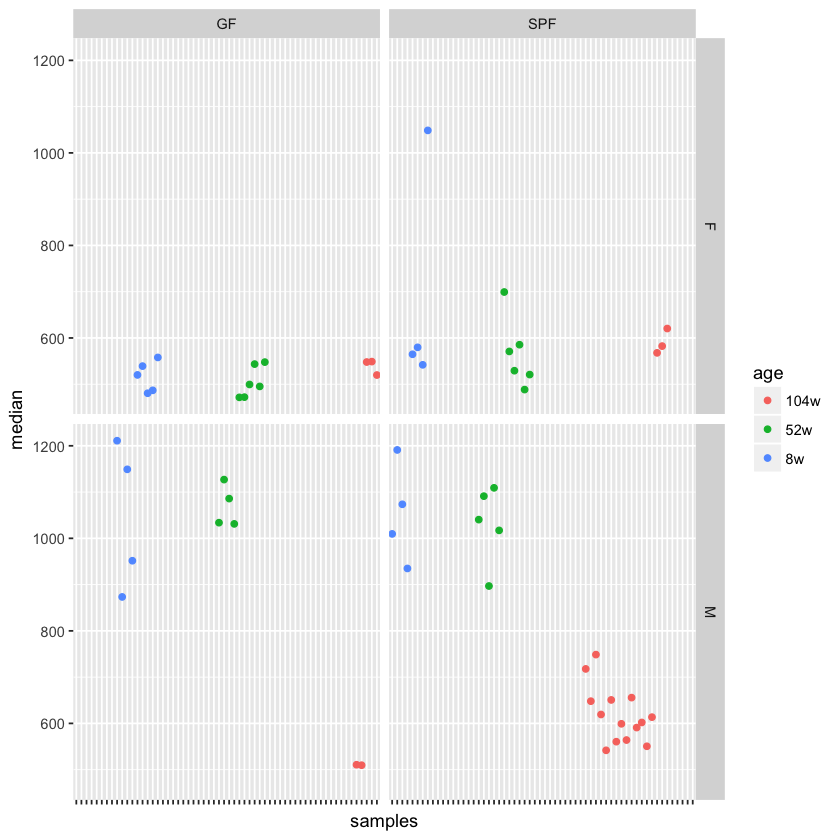

In [38]:
plot_module_count(1, norm_counts, connected_gene_colors, sample_order)

Module 2: response to endoplasmic reticulum stress/transport

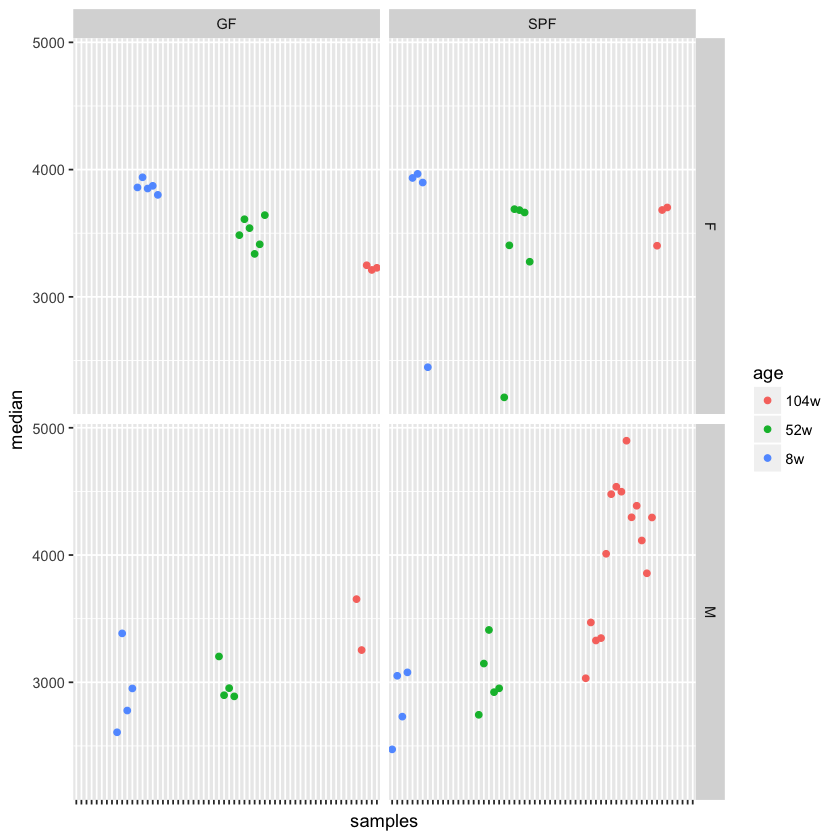

In [39]:
plot_module_count(2, norm_counts, connected_gene_colors, sample_order)

Module 3: metabolic process (ATP, ribonucleoside)

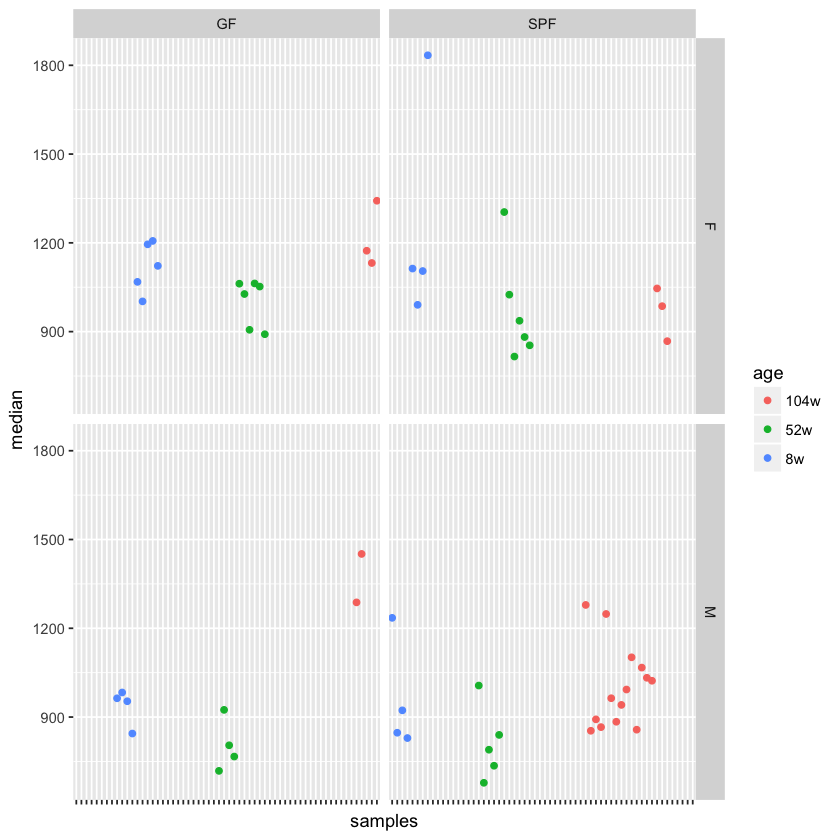

In [40]:
plot_module_count(3, norm_counts, connected_gene_colors, sample_order)

Module 4

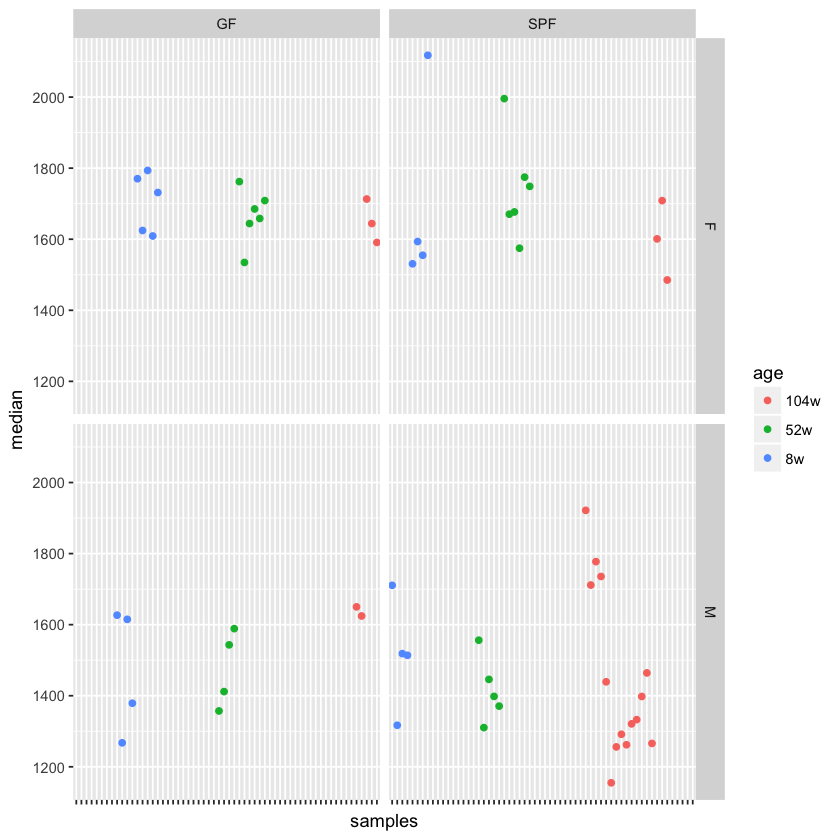

In [41]:
plot_module_count(4, norm_counts, connected_gene_colors, sample_order)

Module 5

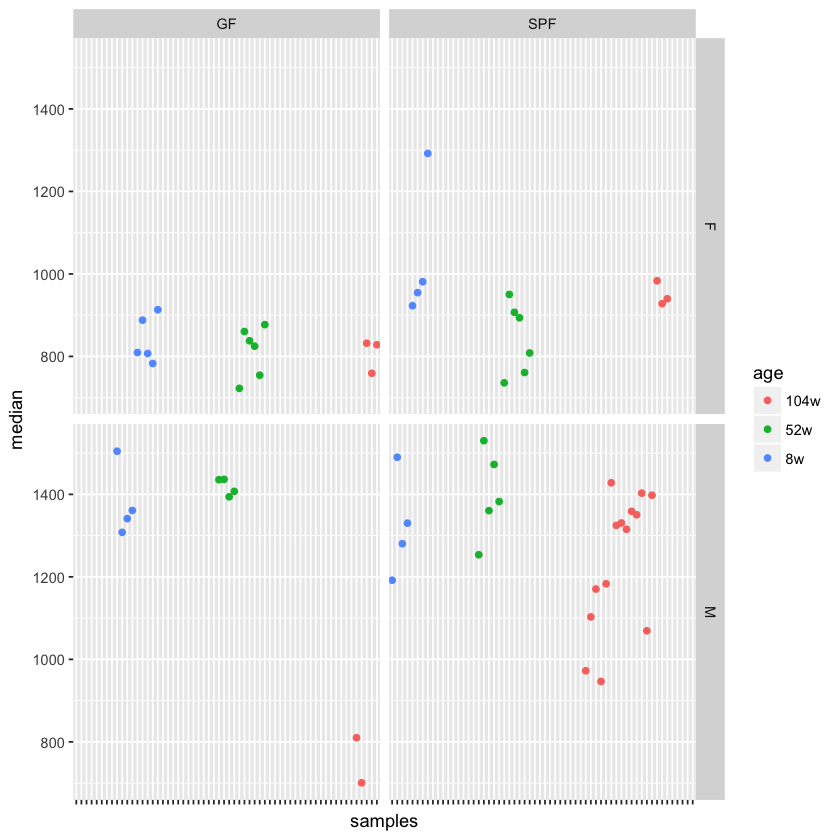

In [42]:
plot_module_count(5, norm_counts, connected_gene_colors, sample_order)

Module 6: metabolic process (primary, cellular)

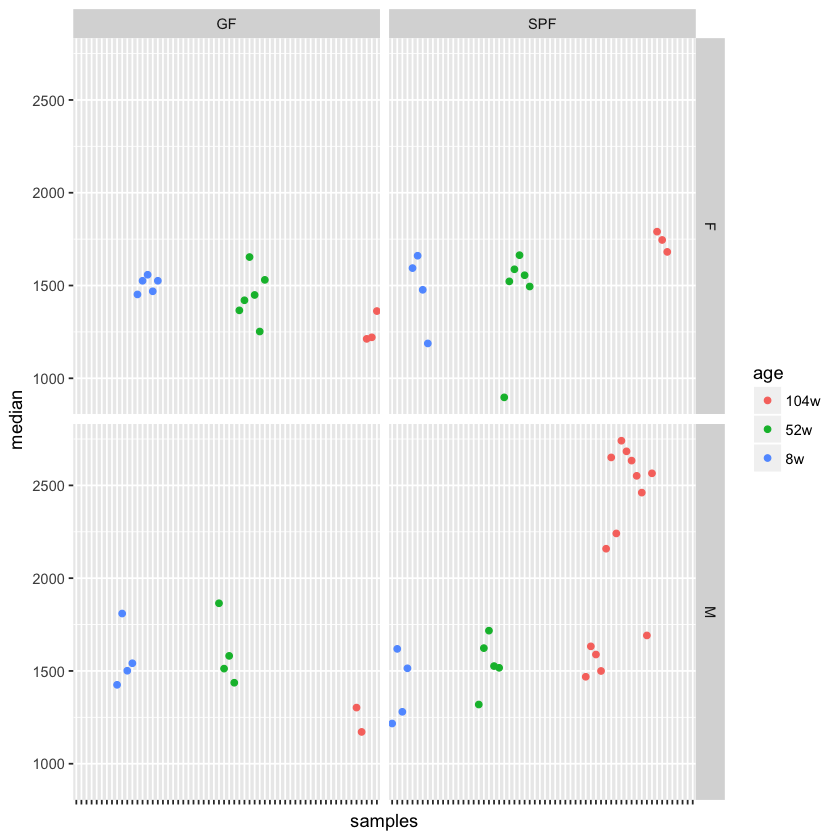

In [43]:
plot_module_count(6, norm_counts, connected_gene_colors, sample_order)

Module 7: immune system

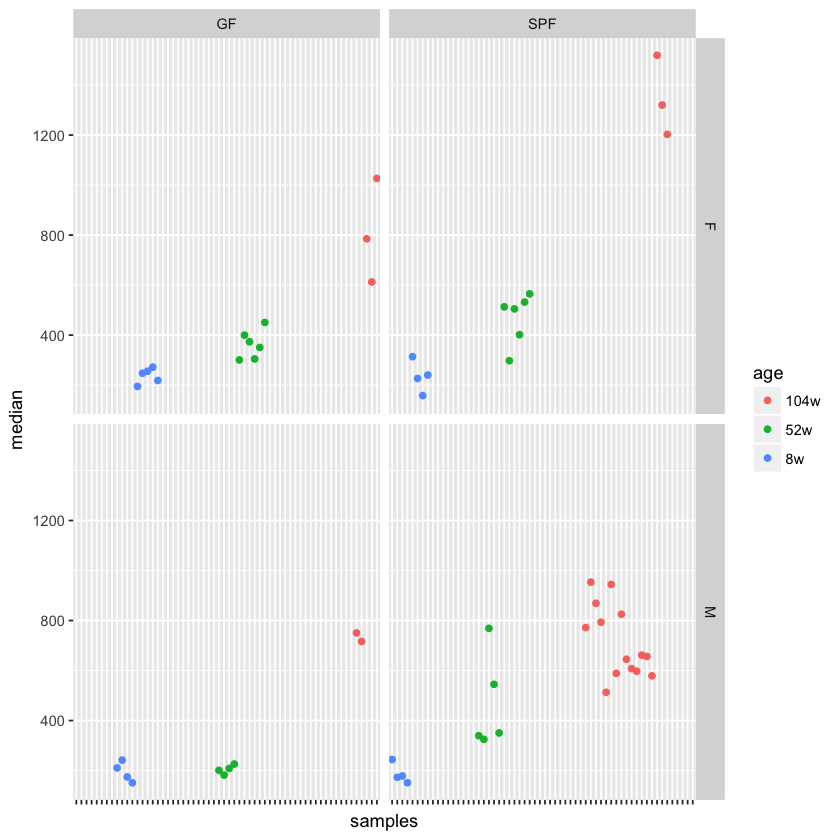

In [44]:
plot_module_count(7, norm_counts, connected_gene_colors, sample_order)

Module 8: translation/rRNA

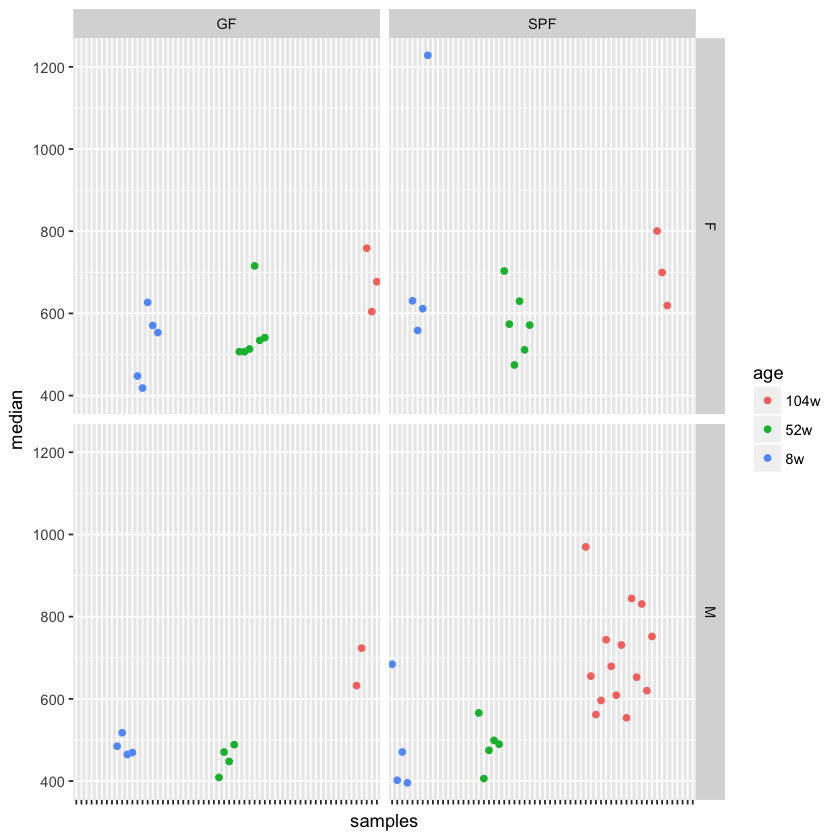

In [45]:
plot_module_count(8, norm_counts, connected_gene_colors, sample_order)

Module 9

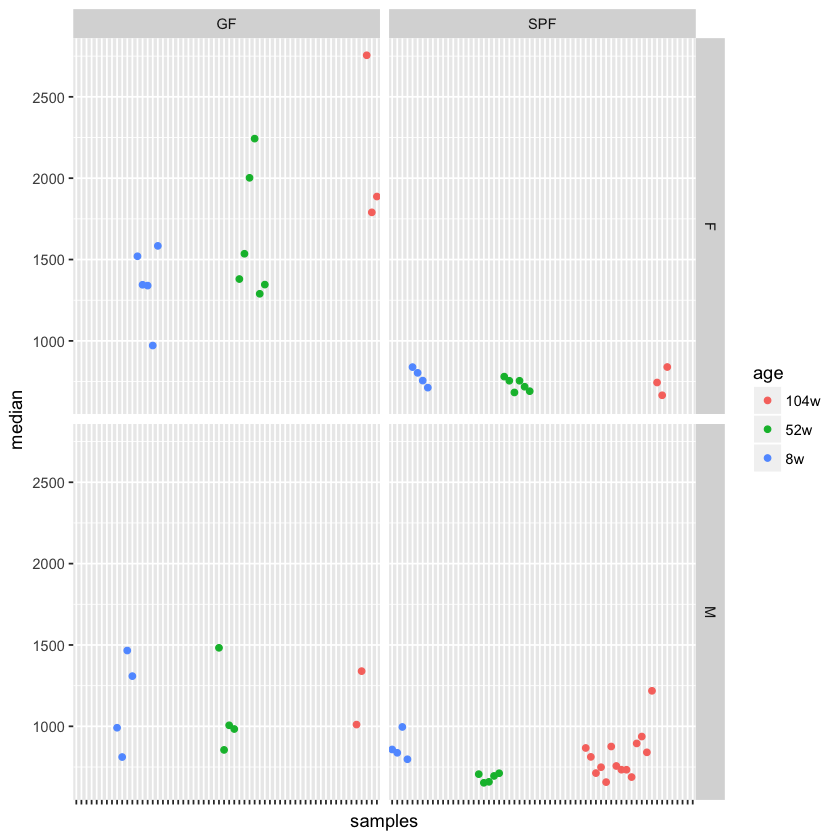

In [46]:
plot_module_count(9, norm_counts, connected_gene_colors, sample_order)

Module 10: organelle

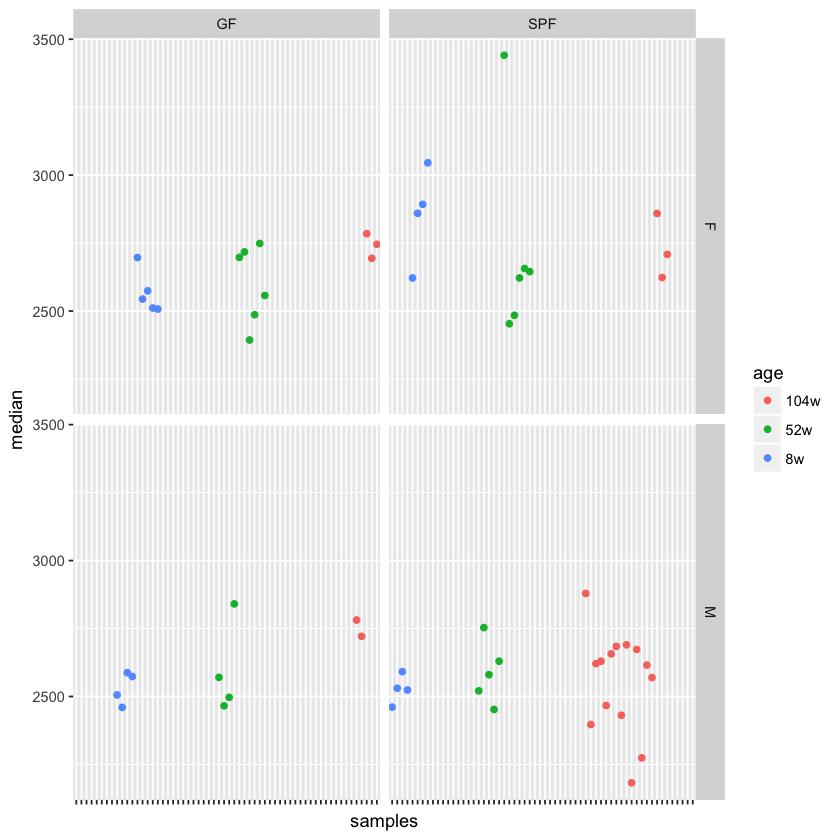

In [47]:
plot_module_count(10, norm_counts, connected_gene_colors, sample_order)

Module 11: localization

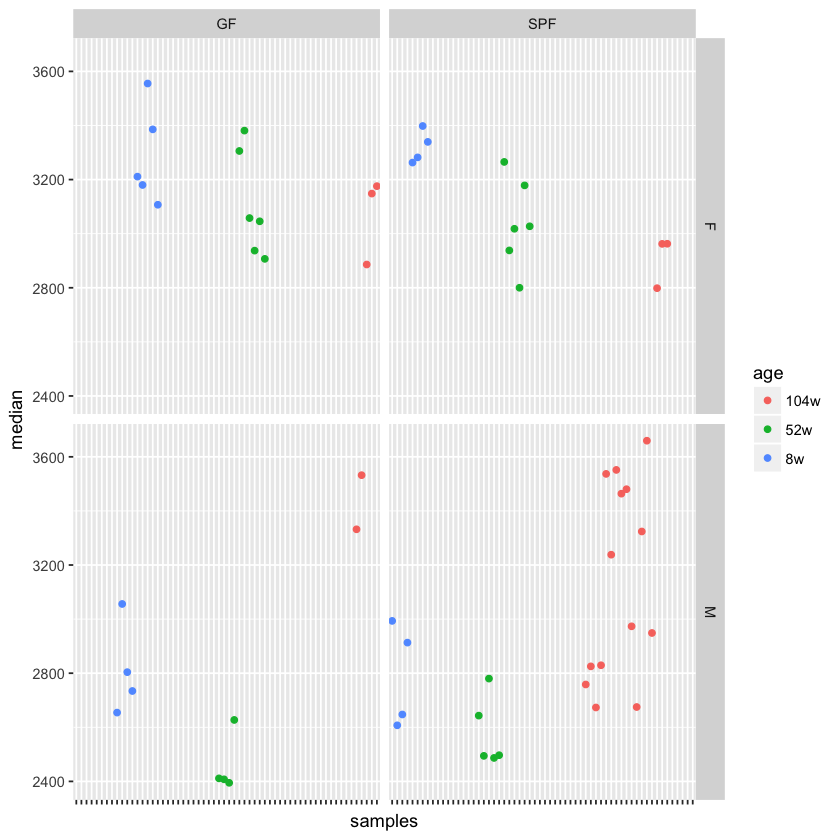

In [48]:
plot_module_count(11, norm_counts, connected_gene_colors, sample_order)